In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2

import tensorflow as tf
from keras.models import load_model

In [2]:
# load pretrained model
age = load_model("d:/Học tập 3/Digital_Processing/Project2/utkcropped/output/cnn_logs/model_100_epochs_age_balan.h5")
gender = load_model("d:/Học tập 3/Digital_Processing/Project2/utkcropped/output/cnn_logs/model_30_epochs_gender_98_new.h5")

In [3]:
gender_classes = {0:"Male",1:"Female"}

age_classes = {
    0:"0-8",
    1:"9-22",
    2:"23-25",
    3:"26-27",
    4:"28-31",
    5:"32-36",
    6:"37-47",
    7:"48-58",
    8:"60+"
}

In [4]:
# preprocess test data
def transform(img):
    img = img.astype(np.float32)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(128,128),cv2.INTER_AREA)
    img = np.expand_dims(img, axis=0)
    return img

1/1 [==============================] - 0s 222ms/step
Male 19
Male 9-22


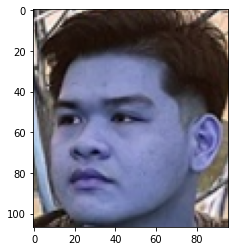

In [5]:
img = cv2.imread("face.png")
pre1 = gender.predict(transform(img))
pre_gen = gender_classes[round(pre1[0][0])] 
pre2 = np.argmax(age.predict(transform(img)))
pre_age = age_classes[pre2]
print("Male 19")
print(pre_gen,pre_age)
plt.imshow(img)
plt.show()

In [7]:
d = pickle.load(open("processed_img_64x64.pickle","rb"))
real_age,real_gender = pickle.load(open("age_gender.pickle","rb"))

1/1 [==============================] - 0s 30ms/step
Male 37
Male 37-47


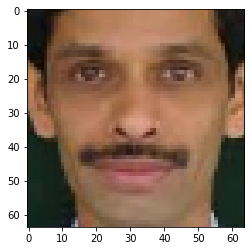

In [25]:
indexx = np.random.randint(1,len(d))
img = d[indexx]
pre1 = gender.predict(transform(img))
pre_gen = gender_classes[round(pre1[0][0])] 
pre2 = np.argmax(age.predict(transform(img)))
pre_age = age_classes[pre2]
print(gender_classes[real_gender[indexx]],real_age[indexx])
print(pre_gen,pre_age)
plt.imshow(d[indexx])
plt.show()